## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
sns.set_palette('colorblind');

## Importing the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Objective of the mall is to identify a pattern in its customer base. In clustering, we dont have any idea of the end outcome i.e., what to predict. 

Using Clustering we are trying to identify patterns in data, how? - We are creating a a dependant variable in such a way that each of the value of the future dependant variable we are creating are classes of this dependant variable.



Selecting only the __Annual income__ and __Spending Score__ column.

In [3]:
X = df.iloc[:,[2,3]].copy()
X.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


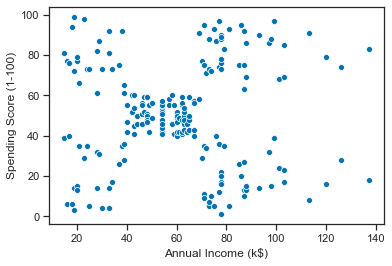

In [5]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)');

## Using the elbow method to find the optimum number of clusters

Use a for loop to try with different number of clusters and compute WCSS (Within cluster sum of squares).

WCSS - Sum of squares distance between each 

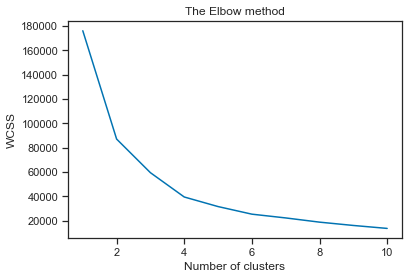

In [6]:
from sklearn.cluster import KMeans
wcss = []   # we will wcss value for each of the number of clusters
for i in range(1,11):
    # init = 'k-means++' - to avoid random initialization issue
    kmeans =  KMeans(n_clusters = i, n_jobs = -1, init = 'k-means++', random_state = 42)   
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss);
plt.title('The Elbow method');
plt.xlabel('Number of clusters');
plt.ylabel('WCSS');
plt.show();

So best number of clusters = 5.

## Training the K-means model on the dataset

Each of the cluster will be a group of 5. We are creating a dpenedant variable. `fit_predict()` will take values from 5 different clusters and in each cluster customers are grouped by similarity. `fit_predict()` will return the dependant variables.

In [7]:
kmeans =  KMeans(n_clusters = 5, n_jobs = -1, init = 'k-means++', random_state = 42)   
y_kmeans = kmeans.fit_predict(X)

In [8]:
print(y_kmeans)

[3 3 3 3 3 3 3 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3 2 3 2 3 3
 3 3 3 2 3 2 3 2 3 2 3 3 3 2 3 3 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 4 4 4 0 4 4 4 0 4 4 4 4 4 4 4 0 4 0 4 4 4 0 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Here we see all customers and the groups/clusters to which each cluster belongs.

In [9]:
df['clusterID'] = pd.Series(y_kmeans).astype(str)
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusterID
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
5,6,Female,22,17,76,3
6,7,Female,35,18,6,3
7,8,Female,23,18,94,3
8,9,Male,64,19,3,2
9,10,Female,30,19,72,3


## Visualizing the clusters

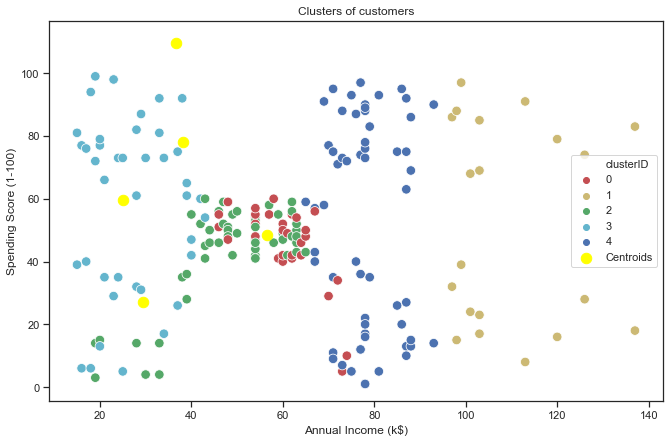

In [10]:
plt.figure(figsize=(11,7));
palette ={"0": "r", "1": "y", "2": "g", "3": "c", "4": "b"}
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', s = 90, hue = 'clusterID', palette=palette);
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 110, c = 'yellow', label = 'Centroids');
plt.title("Clusters of customers");
plt.legend();